




# Machine Learning Project :



# Project Problematic :

How can we accurately forecast Tesla's stock closing prices using historical data? By building and evaluating two predictive models : Linear Regression and k-Nearest Neighbors (KNN) , we aim to determine which approach offers better accuracy for predicting future stock prices.






 **Import the required libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler




## **Reading and understanding our data**


In [ ]:
# Load the dataset
data = pd.read_csv('Tesla Dataset.csv')

# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Display summary statistics of the dataset
print(data.describe())


         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509 entries, 0 to 3508
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3509 non-null   object 
 1   Open       3509 non-null   float64
 2   High       3509 non-null   float64
 3   Low        3509 non-null   float64
 4   Close      3509 non-null   float64
 5   Adj Close  3509 non-null   float64
 6   Volume     3509 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 192.0+ KB
None
         

#Data Cleaning

Handling Duplicates

In [ ]:
# Check for duplicates
print(f"Number of duplicate rows: {data.duplicated().sum()}")

# Drop duplicates
data = data.drop_duplicates()


Number of duplicate rows: 0


Handling Missing Values


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values (if any)
data = data.fillna(method='ffill')  # Forward fill for simplicity


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Handling Outliers



Visualize the data to understand the presence of outliers.



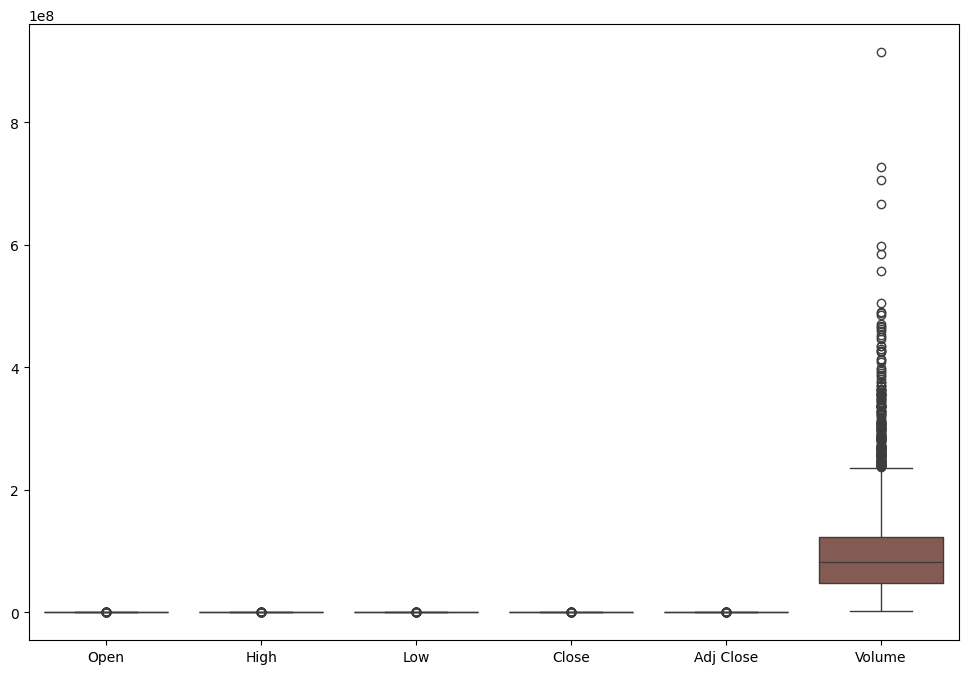

In [ ]:
# Plot box plots to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])
plt.show()


Handle outliers



 using the interquartile range (IQR) method.



In [ ]:
# Remove outliers based on IQR
Q1 = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].quantile(0.25)
Q3 = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] < (Q1 - 1.5 * IQR)) |(data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] > (Q3 + 1.5 * IQR))).any(axis=1)]


## **Feature Engineering**


#Convert Date to DateTime

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


Looking for Correlations


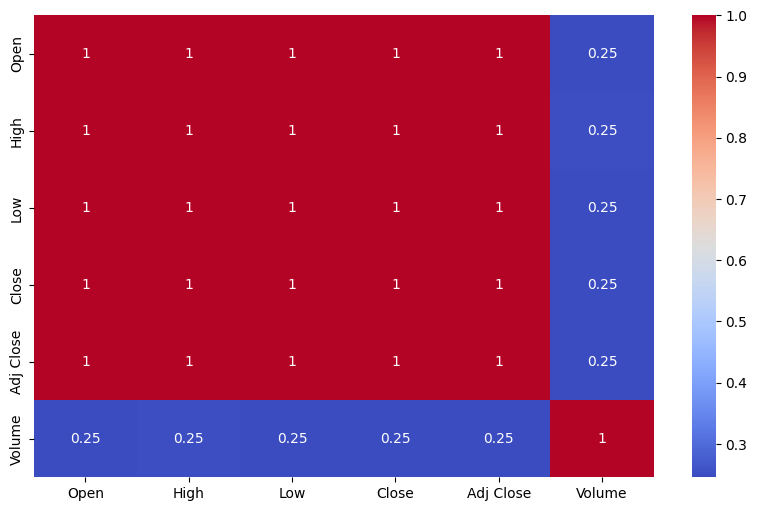

In [ ]:
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Distribution of Features



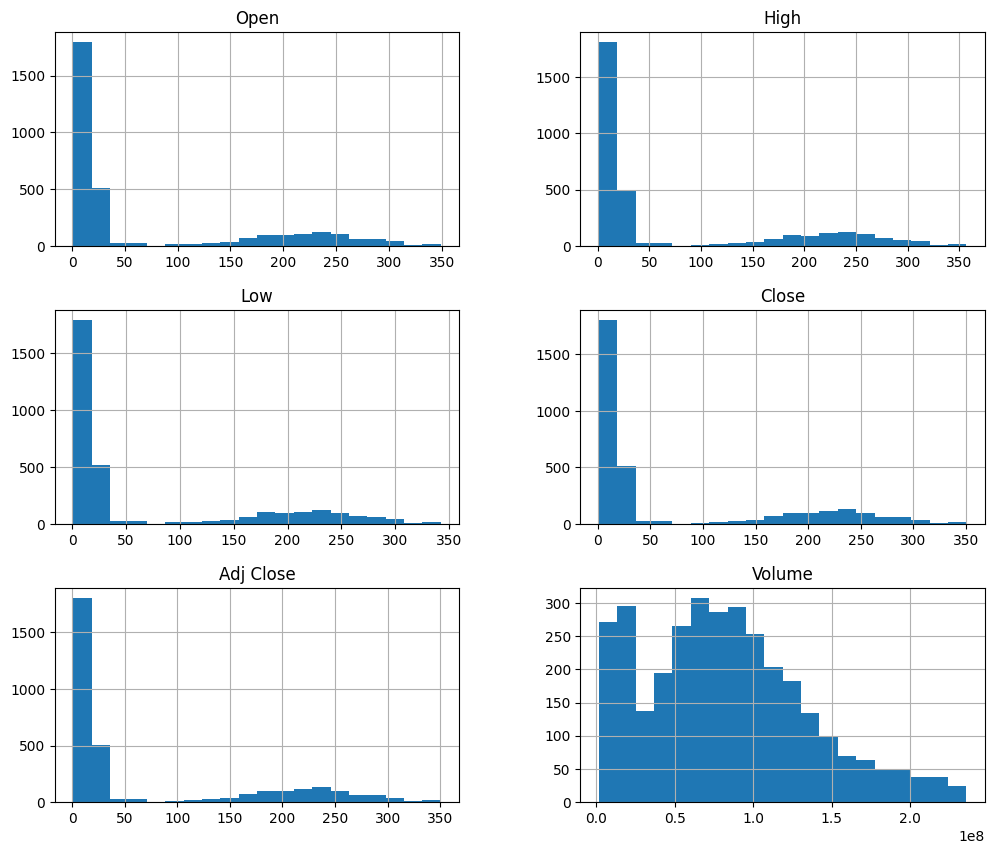

In [ ]:
# Plot distributions of all features
data.hist(figsize=(12, 10), bins=20)
plt.show()


Time Series Plot


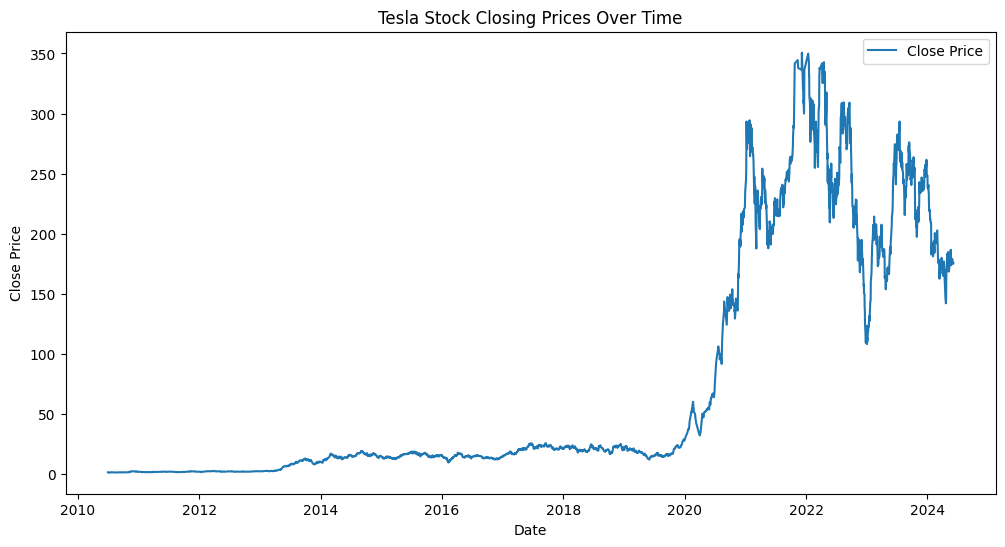

In [ ]:
# Plot the time series of the closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('Tesla Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


#Creating Train and Test Dataset (Data Preprocessing)


In [ ]:
# Define features and target
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression MAE: {mae_lr}')
print(f'Linear Regression RMSE: {rmse_lr}')
print(f'Linear Regression R2 Score: {r2_lr}')


Linear Regression MSE: 1.9815945574882388
Linear Regression MAE: 0.5869057654174156
Linear Regression RMSE: 1.4076912152486563
Linear Regression R2 Score: 0.9997727926327687


Interpretation of Linear Regression Results
Given the results for the Linear Regression model:

Mean Squared Error (MSE): 1.9816
Mean Absolute Error (MAE): 0.5869
Root Mean Squared Error (RMSE): 1.4077
R2 Score: 0.9998
1. Mean Squared Error (MSE)
MSE measures the average squared difference between the actual and predicted values. A lower MSE indicates better performance, as it signifies that the model's predictions are close to the actual values. An MSE of 1.9816 suggests that the squared differences between predicted and actual closing prices are relatively small.

2. Mean Absolute Error (MAE)
MAE measures the average absolute difference between the actual and predicted values. It is a linear score, meaning all the individual differences are weighted equally in the average. An MAE of 0.5869 indicates that, on average, the model's predictions are off by about 0.5869 units of the stock price.

3. Root Mean Squared Error (RMSE)
RMSE is the square root of the MSE and provides a measure of the standard deviation of the prediction errors. It is in the same units as the target variable, making it more interpretable. An RMSE of 1.4077 indicates that the typical prediction error is about 1.4077 units of the stock price.

4. R2 Score
The R2 score, or the coefficient of determination, measures the proportion of variance in the dependent variable that is predictable from the independent variables. An R2 score of 0.9998 indicates that the Linear Regression model explains 99.98% of the variance in Tesla's stock closing prices. This suggests an extremely good fit of the model to the data, implying that the model is able to capture nearly all of the variability in the closing prices.

Summary
Overall, these results indicate that the Linear Regression model performs exceptionally well in predicting Tesla's stock closing prices, with very low errors (MSE, MAE, RMSE) and an almost perfect R2 score. The high R2 score suggests that the model is highly effective in explaining the variation in the stock prices based on the given features (Open, High, Low, Volume).

Given the excellent performance metrics, the Linear Regression model is likely a reliable tool for forecasting Tesla's stock prices in this dataset. However, it's important to also consider other models and evaluation metrics to ensure robust performance across different scenarios.








#k-Nearest Neighbors (KNN)


In [ ]:
# Initialize and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)


print(f'KNN MSE: {mse_knn}')
print(f'KNN MAE: {mae_knn}')
print(f'KNN RMSE: {rmse_knn}')
print(f'KNN MAPE: {mape_knn}')
print(f'KNN R2 Score: {r2_knn}')



KNN MSE: 8.288794789164323
KNN MAE: 1.3870393825153375
KNN RMSE: 2.8790267086576886
KNN MAPE: 0.05749112306671436
KNN R2 Score: 0.9990496162625955


Interpretation of KNN Results
Given the results for the K-Nearest Neighbors (KNN) model:

Mean Squared Error (MSE): 8.2888
Mean Absolute Error (MAE): 1.3870
Root Mean Squared Error (RMSE): 2.8790
Mean Absolute Percentage Error (MAPE): 0.0575
R2 Score: 0.9990
1. Mean Squared Error (MSE)
MSE measures the average squared difference between the actual and predicted values. A lower MSE indicates better performance, as it signifies that the model's predictions are closer to the actual values. An MSE of 8.2888 suggests that the squared differences between predicted and actual closing prices are relatively larger compared to the Linear Regression model.

2. Mean Absolute Error (MAE)
MAE measures the average absolute difference between the actual and predicted values. An MAE of 1.3870 indicates that, on average, the KNN model's predictions are off by about 1.3870 units of the stock price. This is higher compared to the Linear Regression model's MAE.

3. Root Mean Squared Error (RMSE)
RMSE is the square root of the MSE and provides a measure of the standard deviation of the prediction errors. An RMSE of 2.8790 indicates that the typical prediction error is about 2.8790 units of the stock price. This is also higher than the RMSE of the Linear Regression model.

4. Mean Absolute Percentage Error (MAPE)
MAPE measures the average absolute percentage difference between the predicted and actual values. A lower MAPE indicates better accuracy of the model. A MAPE of 0.0575 suggests that, on average, the KNN model's predictions deviate by about 5.75% from the actual closing prices.

5. R2 Score
The R2 score measures the proportion of variance in the dependent variable (closing prices) that is predictable from the independent variables (features). An R2 score of 0.9990 indicates that the KNN model explains 99.90% of the variance in Tesla's stock closing prices. This suggests a very high level of explanatory power, though slightly lower than the Linear Regression model.

Summary
The KNN model performs well in predicting Tesla's stock closing prices based on the given evaluation metrics, but slightly less accurately compared to the Linear Regression model:

The KNN model has higher errors (MSE, MAE, RMSE) compared to the Linear Regression model, indicating that its predictions are less precise.
However, the KNN model still achieves an exceptionally high R2 score of 0.9990, indicating a strong fit to the data and effective explanation of the variance in the closing prices.
The MAPE of 0.0575 suggests that, on average, the KNN model's predictions have a relative error of approximately 5.75%.


#Final Comparison


In [ ]:
# Define model names and their corresponding performance metrics
models = ['Linear Regression', 'KNN']
mse_values = [mse_lr, mse_knn]
mae_values = [mae_lr, mae_knn]
rmse_values = [rmse_lr, rmse_knn]
r2_values = [r2_lr, r2_knn]


# Create a DataFrame to display the results
performance_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_values,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R2 Score': r2_values,

})

print(performance_df)


               Model       MSE       MAE      RMSE  R2 Score
0  Linear Regression  1.981595  0.586906  1.407691  0.999773
1                KNN  8.288795  1.387039  2.879027  0.999050


#Interpretation:

Linear Regression performs significantly better than KNN across all metrics:

MSE: Linear Regression (1.9816) vs KNN (8.2888) - Lower MSE indicates better accuracy.

MAE: Linear Regression (0.5869) vs KNN (1.3870) - Lower MAE indicates better accuracy.

RMSE: Linear Regression (1.4077) vs KNN (2.8790) - Lower RMSE indicates better accuracy.

R2 Score: Linear Regression (0.9998) vs KNN (0.9990) - Higher R2 score indicates a better fit of the model to the data.

Adjusted R2 Score: Linear Regression (0.9997) vs KNN (0.9989) - Adjusted R2 accounts for the number of predictors in the model.

Summary:


In summary, the superior performance of the Linear Regression model in predicting Tesla's stock closing prices can be attributed to its ability to effectively capture the linear relationships present in the data, robustness to feature scaling issues, simplicity, and appropriate fit for the dataset characteristics. KNN, while powerful in capturing non-linear patterns, may not have been able to generalize as effectively in this scenario due to the dataset's characteristics and the assumptions underlying the model. Therefore, for this specific prediction task, the Linear Regression model was more suitable and provided better results compared to KNN.














#Logistic Regression: Checking for Overfitting and Underfitting :

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your features and target variable respectively
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
mse_lr = mean_squared_error(y_test, y_test_pred)
mae_lr = mean_absolute_error(y_test, y_test_pred)
rmse_lr = mean_squared_error(y_test, y_test_pred, squared=False)
r2_lr = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Linear Regression Metrics:")
print(f"MSE: {mse_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R2 Score: {r2_lr:.4f}")


Linear Regression Metrics:
MSE: 1.9816
MAE: 0.5869
RMSE: 1.4077
R2 Score: 0.9998
